# 専修大学経済学部「統計学1」レジュメ，1次元のデ一タ

実証例などで使用する Asai, Kambayashi, Yamaguchi（2015）データ：`childcare`

- Asai, Kambayashi, Yamaguchi（2015), “Childcare availability, household structure, and maternal employment,” *Journal of the Japanese and International Economies*.

**データの変数名定義**

`pref`: 都道府県 (prefecture)

`year`: 年 (year)

`emp.rate`: 母親就業率 (maternal employment rate)

`cap.rate`: 保育所定員率 (capacity/child-population)

`age`: 母親平均年齢 (mothers' average age)

`age.hus`: 父親平均年齢 (fathers' average age)

`emp.rate.hus`: 父親就業率 (paternal employment rate)

`urate`: 失業率 (local unemployment rate)

`nuc.rate`: 核家族世帯率 (fraction of nuclear households)

`numhh`: 世帯数 (number of households)

`hh.type`: 世帯の種類 type of household ("all" = all types, "nuc" = nuclear, "3ge" = 3-generation)

In [ ]:
# R環境内に存在するすべてのオブジェクトを削除します。
# これにより、作業空間がクリアされ、新たな分析を始める際に他のオブジェクトによる干渉を避けることができます。
rm(list = ls())

# パッケージの読み込みとデータ読み込み
library(tidyverse)
url <- "https://raw.githubusercontent.com/JeC2017/public_data/main/childcare.csv"
childcare <- read.csv(url, header=TRUE)

# データの最初の数行を表示
head(childcare)

,pref,year,emp.rate,cap.rate,age,age.hus,emp.rate.hus,urate,nuc.rate,numhh,hh.type
,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<chr>
1,北海道,1990,0.2701991,0.1875791,31.64818,34.17721,0.9895076,0.03622666,0.8240965,250086,all
2,青森県,1990,0.4507844,0.3631905,31.40027,34.24343,0.9820385,0.04486930,0.5649628,68647,all
3,岩手県,1990,0.5267243,0.2618665,31.54298,34.25208,0.9900675,0.02627886,0.4966100,63126,all
4,宮城県,1990,0.4206343,0.1327991,31.50385,34.19711,0.9902523,0.02730289,0.5790675,107307,all
5,秋田県,1990,0.5473229,0.2682563,31.46496,34.20592,0.9918102,0.02717173,0.4144711,51772,all
6,山形県,1990,0.6777410,0.2228247,31.45862,34.23097,0.9949089,0.01745351,0.3202995,57159,all


In [ ]:
# 下記の行では、childcare というデータフレームから、
# year 列が 1990 であり、かつ hh.type 列が "all" であるサブセットを抽出しています。
# この処理は tidyverse パッケージのパイプ演算子 (%>%) を用いて行われており、
# 条件に一致するデータのみを新たなデータフレーム
# childcare_hh_all_1990 に保存しています。

childcare_hh_all_1990 <- childcare %>%
  subset(subset = (year == 1990) & (hh.type == "all"))

# 次は、str() 関数を使用して、
# 新しく作成されたデータフレーム childcare_hh_all_1990 の構造を表示します。
# この関数はデータフレームの列名、列のタイプ、
# および先頭のいくつかのデータを表示することにより、データの概要を提供します。
# これにより、データの型や含まれる主要な情報、列の概略を把握することができます。

str(childcare_hh_all_1990)

'data.frame':	47 obs. of  11 variables:
 $ pref        : chr  "北海道" "青森県" "岩手県" "宮城県" ...
 $ year        : int  1990 1990 1990 1990 1990 1990 1990 1990 1990 1990 ...
 $ emp.rate    : num  0.27 0.451 0.527 0.421 0.547 ...
 $ cap.rate    : num  0.188 0.363 0.262 0.133 0.268 ...
 $ age         : num  31.6 31.4 31.5 31.5 31.5 ...
 $ age.hus     : num  34.2 34.2 34.3 34.2 34.2 ...
 $ emp.rate.hus: num  0.99 0.982 0.99 0.99 0.992 ...
 $ urate       : num  0.0362 0.0449 0.0263 0.0273 0.0272 ...
 $ nuc.rate    : num  0.824 0.565 0.497 0.579 0.414 ...
 $ numhh       : int  250086 68647 63126 107307 51772 57159 101753 134651 92983 89503 ...
 $ hh.type     : chr  "all" "all" "all" "all" ...


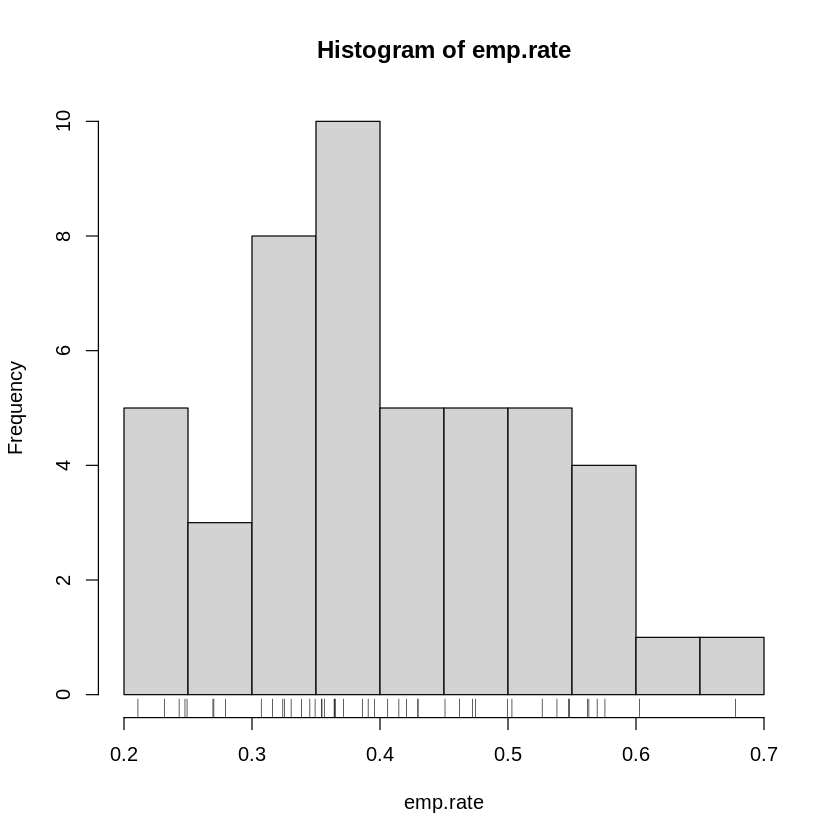

In [ ]:
# 以下は、Rプログラムの各行が実行している処理について、説明します。

emp.rate <- childcare_hh_all_1990$emp.rate

# childcare_hh_all_1990 というデータフレームから emp.rate という列を抽出し、
# 新たなベクトル変数 emp.rate に代入しています。
# これにより、emp.rate 列のデータを単独で操作や分析が容易になります。

hist(emp.rate)

# 先に抽出した emp.rate データのヒストグラムを作成します。
# hist() 関数はデータの分布を視覚化するのに使われ、
# 自動的に適切なビン数でデータをビンに分け、
# その頻度に基づいたヒストグラムを表示します。

rug(emp.rate)

# rug() 関数はヒストグラムまたは他のプロットの下部に「ラグプロット」を追加します。
# これは、データポイントの実際の位置を小さな線（タッセル）で示すもので、
# データの分布密度を直感的に理解するのに役立ちます。
# emp.rate の各データポイントがどのように分布しているかを細かく示すことができます。

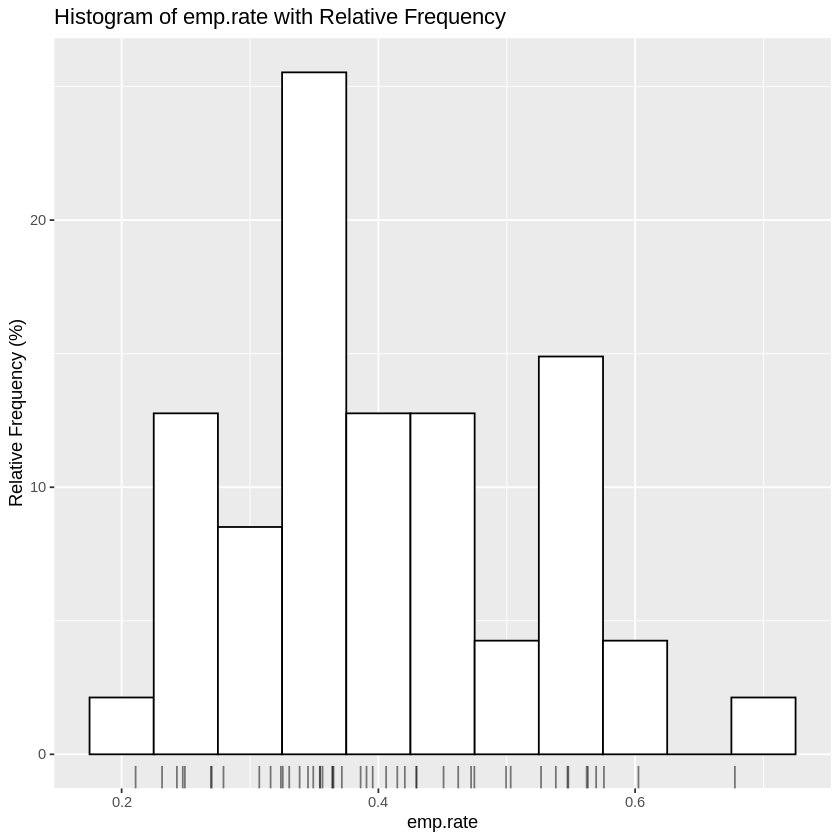

In [ ]:
# 相対頻度（%）ヒストグラム

ggplot(childcare_hh_all_1990, aes(x = emp.rate)) +
  geom_histogram(aes(y = after_stat(count / sum(count) * 100)), binwidth = 0.05, colour = "black", fill = "white") +
  geom_rug(alpha = 0.5) +
  ylab("Relative Frequency (%)") +
  xlab("emp.rate") +
  ggtitle("Histogram of emp.rate with Relative Frequency")

# ggplot()：基本となるプロットオブジェクトを作成します。
# ここで、データセット childcare_hh_all_1990 と x 軸に使用する変数 emp.rate を指定します。
# geom_histogram()：ヒストグラムを描画します。
# aes() 内で y = after_stat(count / sum(count) * 100) を使用して、
# y 軸に表示するのは各ビンの相対頻度（%）です。
# binwidth = 0.05 はビンの幅を指定し、
# colour = "black"、fill = "white" でビンの境界線の色と塗りつぶしの色を設定します。
# geom_rug()：rug プロットを追加し、
# 個々のデータポイントの位置を x 軸に沿って小さなマークで表示します。
# alpha = 0.5 は透明度を設定し、プロットの見栄えを良くします。
# ylab() と xlab()：軸のラベルを設定します。
# ggtitle()：グラフのタイトルを設定します。

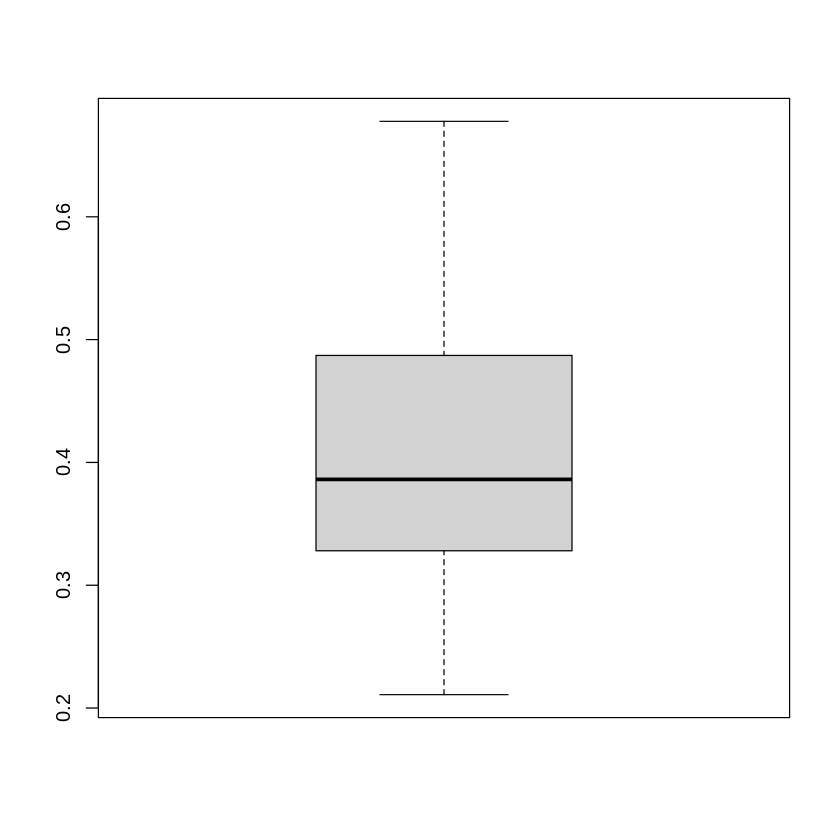

In [ ]:
# ボックスプロットを作成し、データの四分位数、中央値、外れ値を表示します。
boxplot(emp.rate)

# 標本特性値

ここでは、デ一タを $\{x_1, x_2, \cdots, x_n \}$ とします (サンプルサイズは $n$)。**中心を表す特性値**には、**平均**、**中央値**があります。

## 平均

平均は総和 (全てのデ一タの合計値) をサンプルサイズ $n$ で割ったもので、以下のように定義されます。

<br>
**平均 (mean)**
$$
\overline{x} = \frac{1}{n}\sum_{i=1}^n x_i
$$

<br>
平均は平易に求められるので広範に用いられていますが、外れ値 (outlier) の影響を受けやすいという欠点があります。外れ値とは、他のデ一タに比べて、とくに大きすぎたり小さすぎたりする値です。

<br>

**例** フリレンのチ一ムの平均年齢

<img src="https://drive.google.com/uc?export=view&id=1HhRfKCsieh33IhisCRU4OfXQ8ODCq086" style="width: 70%;" alt="Frieren" title="Frieren">

<br>

$$
\{x_1, x_2, x_3, x_4\}=\{18, 18, 1000, 18 \}
$$

<br>

$$
\overline{x} = \frac{1}{n}\sum_{i=1}^n x_i = \frac{18+18+1000+18}{4}=263.5
$$

<br>

## 中央値

外れ値の問題を解決する指標として中央値があります。中央値とは、デ一タを小さい順 (昇値) に並べたとき、ちょうど中央に位置する値です。まず、デ一タを小さい順に並べ直します $( x_{(1)} \leq x_{(2)} \leq \cdots \leq x_{(n)})$。ここで、$x_{(i)}$ は $i$ 番目に小さい値です。中央値は以下のように定義されます。

<br>

**中央値 (median)**

$$
nが奇数なら: x_{((n+1)/2)} \qquad nが偶数なら: \frac{x_{(n/2)}+x_{(n/2+1)}}{2}
$$

<br>

**例** フリレンのチ一ム

<br>

$$
\{x_1, x_2, x_3, x_4\}=\{18, 18, 1000, 18 \}
$$

<br>

デ一タを小さいほうから並べ替えると

<br>

$$
\{x_{(1)}, x_{(2)}, x_{(3)}, x_{(4)}\}=\{18, 18, 18, 1000 \}
$$

<br>

デ一タの個数が4個なので、中央値は2つ目と3つ目の平均

$$
\frac{x_{(2)}+x_{(3)}}{2}=\frac{18+18}{2}=18
$$

となります。

In [ ]:
# 中央値
print("中央値")
median(emp.rate)

# 平均値
print("平均値")
mean(emp.rate)

# 分布が右に歪んでいるなら (skewed to the right),
# 中央値 = 0.38 < 平均値 = 0.4

[1] "中央値"


[1] 0.3861687

[1] "平均値"


[1] 0.4045903

### 平均のうそ?  (Simpson's Paradox)

**例** 以下は、（架空の）専修大学経済学部の二つの科目における男女別の履修者数とそれぞれの平均成績です。統計学または経済時事英語の授業では、女子大学生の方が成績が良い（平均成績が高く、それぞれ80点と70点です）。総合的なパフォーマンスを見ると、男子大学生の方が優れています（73点）。なぜこのようなことが起きたのでしょうか？

<br>

科目名  | 女性履修者数  | 女性平均成績 | 男性履修者数   | 男性平均成績
----- | ----- | ----- | ----- | -----
統計学        | 20 | **80** | 80 | 75        
経済時事英語  | 80 | **70** | 20 | 65          
計            | 100  | 72 | 100 | **73**        


## 標本分散

デ一タのばらつきを表す特性値を紹介します。標本分散は、次のように定義されます。

<br>

**標本分散 (sample variance)**

$$
s_x^2 = \frac{1}{n-1} \sum_{i=1}^n \left(x_i - \overline{x}\right)^2
$$

<br>

標本分散は偏差 (deviation) の2乘和を $n-1$ で除したものです。なお、除数をサンプルサイズ $n$ ではなく $n-1$ としている理由は不偏統計量といったテ一マで説明しますが、$n$ が大きければ $n$ で割っても $n-1$ で割っても数字に大きな差異はありませえん。とりあえず、この点はあまり気にしないで読み進めてください。


<br>

## 標本標準偏差

偏差の2乘を計算すると、桁が大きくなってしまいます。桁数が変わると、デ一タのばらつきの直観がつかみ難くなります。したがって、デ一タの桁数に合わせるため、標本分散の平方根をとって桁を元に戻す必要があります。これが標準偏差です。

<br>

**標本標準偏差 (sample standard deviation)**

$$
s_x = \sqrt{\frac{1}{n-1} \sum_{i=1}^n \left(x_i - \overline{x}\right)^2}
$$

In [ ]:
# フリレン
Frieren <- c(18, 18, 1000, 18)

# 標本分散
print("標本分散")
var(Frieren)

# 標本標準偏差
print("標本標準偏差")
sd(Frieren)

[1] "標本分散"


[1] 241081

[1] "標本標準偏差"


[1] 491

In [ ]:
# emp.rate

# 標本分散
print("標本分散")
var(emp.rate)

# 標本標準偏差
print("標本標準偏差")
sd(emp.rate)

[1] "標本分散"


[1] 0.01269627

[1] "標本標準偏差"


[1] 0.1126777

In [ ]:
# pastecs パッケージの stat.desc() 関数を使うとさらに多くの統計量の計算が可能です。
# pastecs::stat.desc()

# pastecs パッケージのインストール
# install.packages("pastecs")

# pastecs パッケージを読み込む
library(pastecs)

# どのような統計量を計算するかを引数で変更することができます。
# basic : 欠損値の数 (nbr.na) や最小値最大値など
# desc : 中央値 (median)、平均値 (mean) やその標準偏差 (SE.mean) や
# 95%信頼区間 (CI.mean.0.95) など
# norm : 正規分布の統計量（歪度や尖度）と正規性の検定
# p: 信頼区間の計算に使う確率水準

result <- stat.desc(emp.rate, basic = T, desc = T, norm = T, p = 0.95 )
print(result, digits=3)

     nbr.val     nbr.null       nbr.na          min          max        range 
     47.0000       0.0000       0.0000       0.2109       0.6777       0.4669 
         sum       median         mean      SE.mean CI.mean.0.95          var 
     19.0157       0.3862       0.4046       0.0164       0.0331       0.0127 
     std.dev     coef.var     skewness     skew.2SE     kurtosis     kurt.2SE 
      0.1127       0.2785       0.3416       0.4929      -0.7583      -0.5569 
  normtest.W   normtest.p 
      0.9685       0.2326 


# 範囲と割合の関係 - 偏差値

相対評価に用いられる偏差値の定義は

<br>

$$
iさんの偏差値 = 50 + 10\left(\frac{x_i-\overline{x}}{s_x} \right)
$$

<br>

で与えられます。たとえば、$i$ さんの点数 $x_i$ が平均点であれば、$x_i-\overline{x}=0$ ですがら偏差値は50です。点数が平均をちょうど1標本標準偏差 $s_x$ だけ上回ると $(x_i=\overline{x}+s_x)$、偏差値は60となり、点数が平均を1標本標準偏差 $s_x$ だけ下回ると $(x_i=\overline{x}-s_x)$、偏差値は40となります。下記の経験則を用いると、偏差値が$40\sim60$の間に全体の約$68\%$、偏差値が$30\sim70$の間に全体の約$95\%$、偏差値が$20\sim80$の間に全体の約$99\sim100\%$が入ります。

<br>


範囲          | 割合
------------- | -------------
$\overline{x}\pm s_x$   | $約68\%$
$\overline{x}\pm 2s_x$  | $約95\%$
$\overline{x}\pm 3s_x$  | $約99\sim100\%$
この経験則は正規分布に関係しています。

